In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'E:/Project/Data/train'
valid_path = 'E:/Project/Data/test'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('E:/Project/Data/train/*')

In [6]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('E:/Project/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3366 images belonging to 3 classes.


In [11]:
test_set = test_datagen.flow_from_directory('E:/Project/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3366 images belonging to 3 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

D:\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
106/106 [==============================] - 334s 3s/step - loss: 2.8379 - accuracy: 0.7454 - val_loss: 0.5671 - val_accuracy: 0.8761
Epoch 2/10
106/106 [==============================] - 297s 3s/step - loss: 0.2954 - accuracy: 0.9248 - val_loss: 0.1957 - val_accuracy: 0.9525
Epoch 3/10
106/106 [==============================] - 297s 3s/step - loss: 0.2580 - accuracy: 0.9343 - val_loss: 0.1302 - val_accuracy: 0.9590
Epoch 4/10
106/106 [==============================] - 287s 3s/step - loss: 0.2164 - accuracy: 0.9424 - val_loss: 0.0423 - val_accuracy: 0.9887
Epoch 5/10
106/106 [==============================] - 270s 3s/step - loss: 0.0896 - accuracy: 0.9730 - val_loss: 0.1201 - val_accuracy: 0.9786
Epoch 6/10
106/106 [==============================] - 259s 2s/step - loss: 0.1360 - accuracy: 0.9649 - val_loss: 0.0777 - val_accuracy: 0.9747
Epoch 7/10
106/106 [==============================] - 260s 2s/step - loss: 0.0947 - accuracy: 0.9750 - val_loss: 0.0770 - val_accuracy: 0.9807

In [13]:
import matplotlib.pyplot as plt

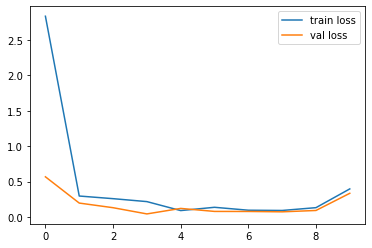

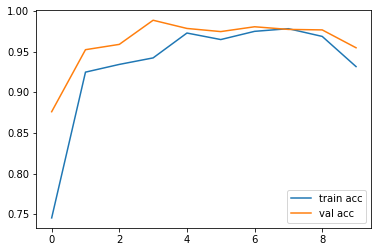

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('E:/Project/Model/new_model.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [19]:
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[   0, 1269],
       [   1, 1121],
       [   2,  976]], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import glob

In [30]:
model=load_model('E:/Project/Model/new_model.h5')

path = 'E:/Project/test_images/*.png'

In [31]:
def predict_val(path):
    res = []
    classes = ["Benign", "Malignant", "Normal"]
    for file in glob.glob(path):
        img=image.load_img(file,target_size=(224,224))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        img_data=preprocess_input(x)
        a=np.argmax(model.predict(img_data))
        val = classes[a.item(0)]
        res.append(val)
    return res

In [32]:
result = predict_val(path)

result

['Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Normal',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal']